<a href="https://colab.research.google.com/github/acse-rt1120/test/blob/main/test_WB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Original code

In [ ]:
%pip install numpy cython
%pip install POT
import ot
%matplotlib inline
import numpy as np
import pylab as pl
import ot
import torch
from torchvision import datasets, transforms
import torch  # Pytorch
import torch.nn as nn  # Neural network module
import torch.nn.functional as fn  # Function module
from torchvision import datasets  # Datasets from torchvision
from torchvision import transforms  # Transforms from torchvision

import matplotlib.pyplot as plt  # Plotting using matplotlib
import numpy as np  # Numpy
from numpy import linalg
device = 'cuda'  # Set out device to GPU

print('done')  # Let me know this cell has finished

     |████████████████████████████████| 440kB 5.3MB/s 
done


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
%cd content

In [ ]:
%cd drive/MyDrive/ACSE9

/content/drive/MyDrive/ACSE9


In [ ]:
normalize = lambda p: p/np.sum(p)

In [ ]:
epsilon = 0.002

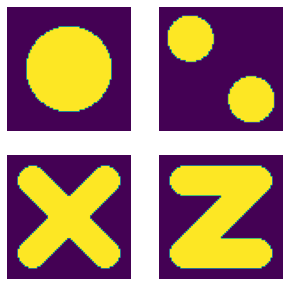

In [ ]:
N = 70
import imageio
rescale = lambda x: (x-x.min())/(x.max()-x.min())
names = ['disk','twodisks','letter-x','letter-z']
vmin = .01
A_ = np.zeros([len(names),N,N])
for i in range(len(names)):
    a = imageio.imread("nt_toolbox/data/" + names[i] + ".bmp") # ,N) 
    a = normalize(rescale(a)+vmin)
    A_[i,:,:] = a
R = len(names)
plt.figure(figsize=(5,5))
for i in range(R):
    plt.subplot(2,2,i+1)
    plt.imshow(A_[i,:,:])
    plt.axis('off');

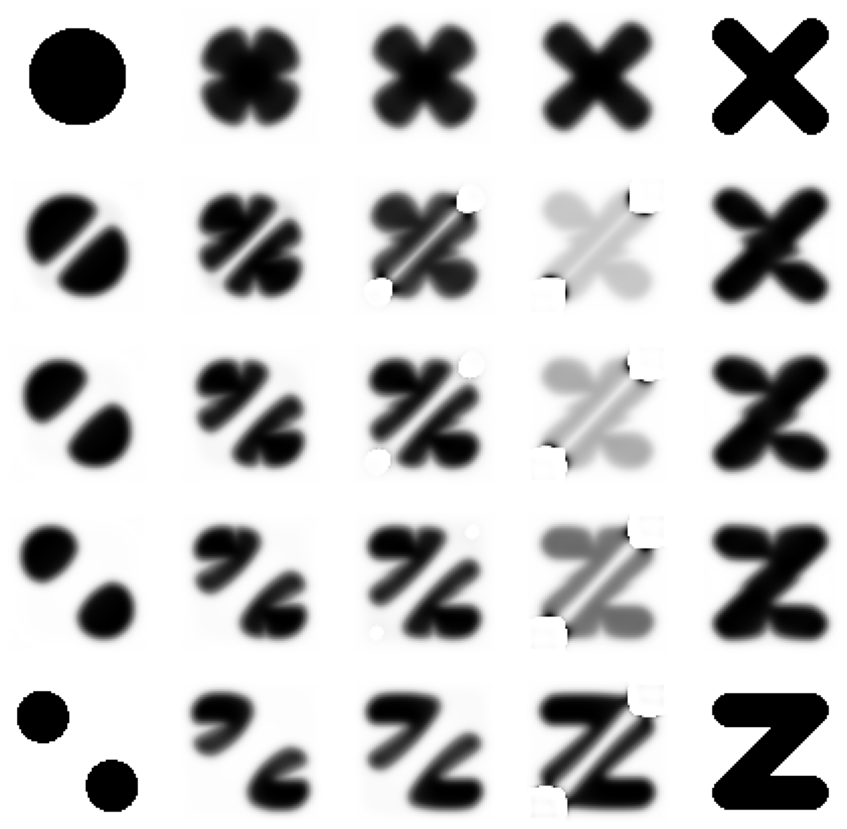

In [ ]:
nb_images = 5
pl.figure(figsize=(15, 15))
pl.title('Convolutional Wasserstein Barycenters in POT')
cm = 'Greys'
# regularization parameter
reg = 0.002
v1 = np.array((1, 0, 0, 0))
v2 = np.array((0, 1, 0, 0))
v3 = np.array((0, 0, 1, 0))
v4 = np.array((0, 0, 0, 1))

for i in range(nb_images):
    for j in range(nb_images):
        pl.subplot(nb_images, nb_images, i * nb_images + j + 1)
        tx = float(i) / (nb_images - 1)
        ty = float(j) / (nb_images - 1)

        # weights are constructed by bilinear interpolation
        tmp1 = (1 - tx) * v1 + tx * v2
        tmp2 = (1 - tx) * v3 + tx * v4
        weights = (1 - ty) * tmp1 + ty * tmp2

        if i == 0 and j == 0:
            pl.imshow(A_[0,:,:], cmap=cm)
            pl.axis('off')
        elif i == 0 and j == (nb_images - 1):
            pl.imshow(A_[2,:,:], cmap=cm)
            pl.axis('off')
        elif i == (nb_images - 1) and j == 0:
            pl.imshow(A_[1,:,:], cmap=cm)
            pl.axis('off')
        elif i == (nb_images - 1) and j == (nb_images - 1):
            pl.imshow(A_[3,:,:], cmap=cm)
            pl.axis('off')
        else:
            # call to barycenter computation
            pl.imshow(ot.bregman.convolutional_barycenter2d(A_, reg, weights), cmap=cm)
            pl.axis('off')
pl.show()

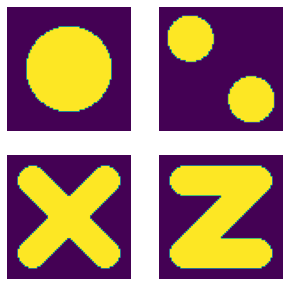

In [ ]:
N = 70
import imageio
rescale = lambda x: (x-x.min())/(x.max()-x.min())
names = ['disk','twodisks','letter-x','letter-z']
vmin = .01
A = np.zeros([N,N,len(names)])
for i in range(len(names)):
    a = imageio.imread("nt_toolbox/data/" + names[i] + ".bmp") # ,N) 
    a = normalize(rescale(a)+vmin)
    A[:,:,i] = a
R = len(names)
plt.figure(figsize=(5,5))
for i in range(R):
    plt.subplot(2,2,i+1)
    plt.imshow(A[:,:,i])
    plt.axis('off');

In [ ]:
#define K
t = np.linspace(0,1,N)
[Y,X] = np.meshgrid(t,t)
K1 = np.exp(-(X-Y)**2/epsilon)
K = lambda x: np.dot(np.dot(K1,x),K1)

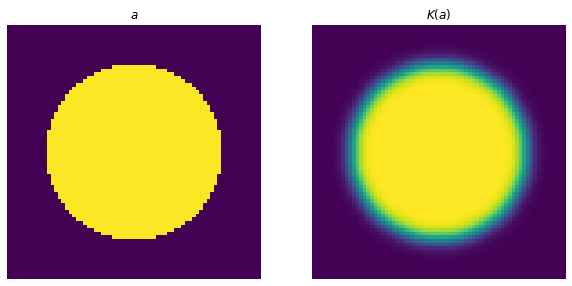

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(A[:,:,0])
plt.title("$a$")
plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(K(A[:,:,0]))
plt.title("$K(a)$")
plt.axis('off');

[  9.00838684  -2.79284188  -2.97944941 ... -39.03490961 -39.0119339
 -39.05384826]


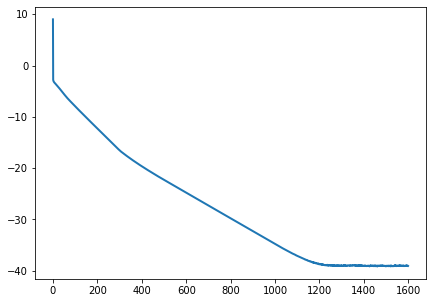

In [ ]:
from numpy import linalg

lambd = np.ones(R)/R
niter = 1600
v = np.ones([N,N,R])
u = np.copy(v)
Err_q = np.zeros(niter)

for i in range(niter):

    for k in range(R):
        Err_q[i] = Err_q[i] + linalg.norm(u[:,:,k]*K(v[:,:,k]) - A[:,:,k], 1)
        u[:,:,k] = A[:,:,k]/K(v[:,:,k])

    b = np.zeros(N)
    for k in range(R):
        b = b + lambd[k] * np.log(np.maximum(1e-19*np.ones(len(v[:,:,k])), v[:,:,k]*K(u[:,:,k])))
    b = np.exp(b)

    for k in range(R):
        v[:,:,k] = b/K(u[:,:,k])
print(np.log(Err_q))
plt.figure(figsize=(7,5))
plt.plot(np.log(Err_q),linewidth = 2)
plt.show()

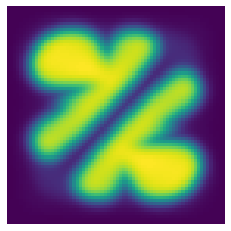

In [ ]:
plt.imshow(b)
plt.axis('off');

# 1.2 crop it

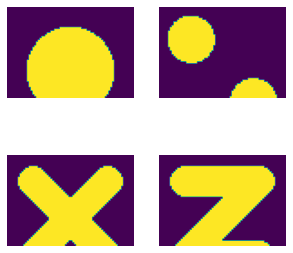

In [ ]:
N = 70
N0 = 50
import imageio
rescale = lambda x: (x-x.min())/(x.max()-x.min())
names = ['disk','twodisks','letter-x','letter-z']
vmin = .01
AA = np.zeros([len(names),N0,N])
for i in range(len(names)):
    aa = imageio.imread("nt_toolbox/data/" + names[i] + ".bmp") # ,N) 
    aa = normalize(rescale(aa)+vmin)
    AA[i,:,:] = aa[:N0]
R = len(names)
plt.figure(figsize=(5,5))
for i in range(R):
    plt.subplot(2,2,i+1)
    plt.imshow(AA[i,:,:])
    plt.axis('off');

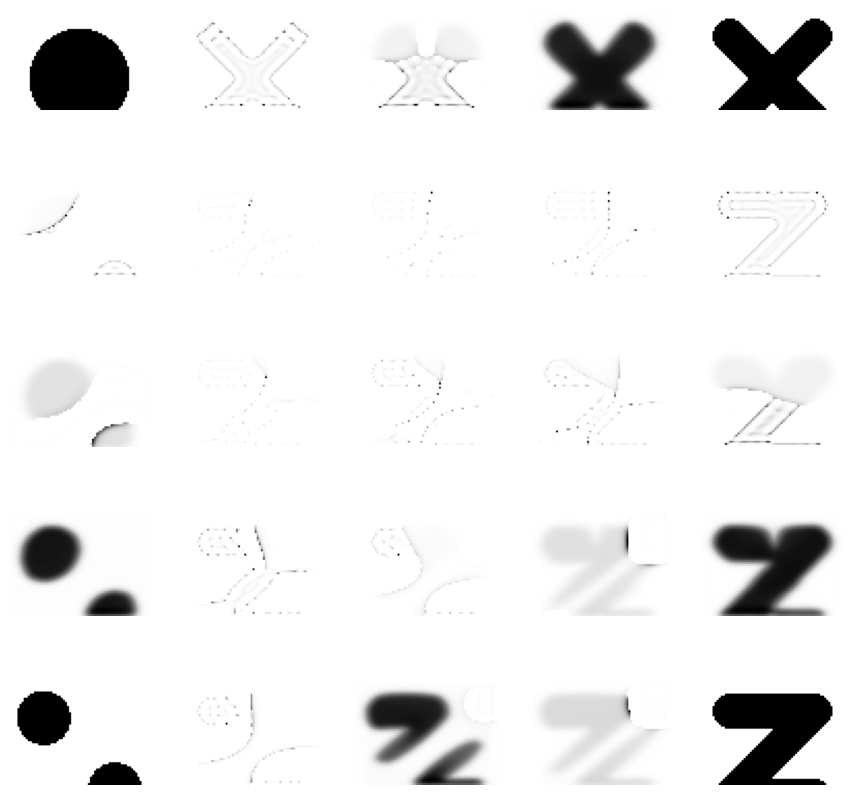

In [ ]:
nb_images = 5
pl.figure(figsize=(15, 15))
pl.title('Convolutional Wasserstein Barycenters in POT')
cm = 'Greys'
# regularization parameter
reg = 0.002
v1 = np.array((1, 0, 0, 0))
v2 = np.array((0, 1, 0, 0))
v3 = np.array((0, 0, 1, 0))
v4 = np.array((0, 0, 0, 1))

for i in range(nb_images):
    for j in range(nb_images):
        pl.subplot(nb_images, nb_images, i * nb_images + j + 1)
        tx = float(i) / (nb_images - 1)
        ty = float(j) / (nb_images - 1)

        # weights are constructed by bilinear interpolation
        tmp1 = (1 - tx) * v1 + tx * v2
        tmp2 = (1 - tx) * v3 + tx * v4
        weights = (1 - ty) * tmp1 + ty * tmp2

        if i == 0 and j == 0:
            pl.imshow(AA[0,:,:], cmap=cm)
            pl.axis('off')
        elif i == 0 and j == (nb_images - 1):
            pl.imshow(AA[2,:,:], cmap=cm)
            pl.axis('off')
        elif i == (nb_images - 1) and j == 0:
            pl.imshow(AA[1,:,:], cmap=cm)
            pl.axis('off')
        elif i == (nb_images - 1) and j == (nb_images - 1):
            pl.imshow(AA[3,:,:], cmap=cm)
            pl.axis('off')
        else:
            # call to barycenter computation
            pl.imshow(ot.bregman.convolutional_barycenter2d(AA, reg, weights), cmap=cm)
            pl.axis('off')
pl.show()

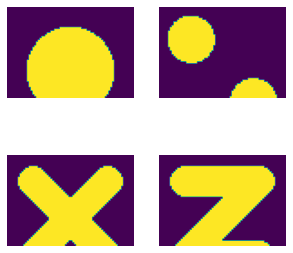

In [ ]:
N = 70
N0 = 50
import imageio
rescale = lambda x: (x-x.min())/(x.max()-x.min())
names = ['disk','twodisks','letter-x','letter-z']
vmin = .01
AA = np.zeros([N0,N,len(names)])
for i in range(len(names)):
    aa = imageio.imread("nt_toolbox/data/" + names[i] + ".bmp") # ,N) 
    aa = normalize(rescale(aa)+vmin)
    AA[:,:,i] = aa[:N0]
R = len(names)
plt.figure(figsize=(5,5))
for i in range(R):
    plt.subplot(2,2,i+1)
    plt.imshow(AA[:,:,i])
    plt.axis('off');

In [ ]:
#define new K with referece Computational Optimal Transport
t0 = np.linspace(0,1,N0)
[Y0,X0] = np.meshgrid(t0,t0)
K0 = np.exp(-(X0-Y0)**2/epsilon)
t1 = np.linspace(0,1,N)
[Y1,X1] = np.meshgrid(t1,t1)
K1 = np.exp(-(X1-Y1)**2/epsilon)
K = lambda x: (K0 @ x) @ K1

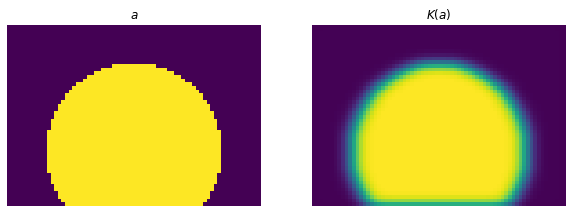

In [ ]:
#quite good right now
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(AA[:,:,0])
plt.title("$a$")
plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(K(AA[:,:,0]))
plt.title("$K(a)$")
plt.axis('off');

[ 8.33022297 -2.96213767 -3.04615838 ... -4.99382131 -4.99382131
 -4.99382131]


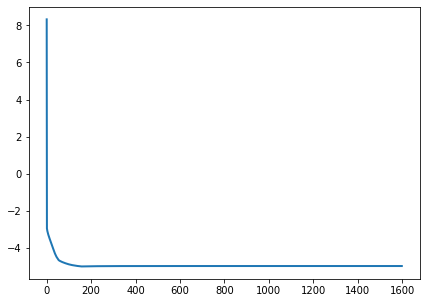

In [ ]:
from numpy import linalg
lambd = np.ones(R)/R
niter = 1600
v = np.ones([N0,N,R])
u = np.copy(v)
Err_q = np.zeros(niter)

for i in range(niter):

    for k in range(R):
        Err_q[i] = Err_q[i] + linalg.norm(u[:,:,k]*K(v[:,:,k]) - AA[:,:,k], 1) # indexing problem with Err_q
        u[:,:,k] = AA[:,:,k]/K(v[:,:,k])

    b = np.zeros(N)
    for k in range(R):
        b = b + lambd[k] * np.log(np.maximum(1e-19*np.ones(np.shape(v[:,:,k])), v[:,:,k]*K(u[:,:,k])))
    b = np.exp(b)

    for k in range(R):
        v[:,:,k] = b/K(u[:,:,k])
print(np.log(Err_q))
plt.figure(figsize=(7,5))
plt.plot(np.log(Err_q),linewidth = 2)
plt.show()

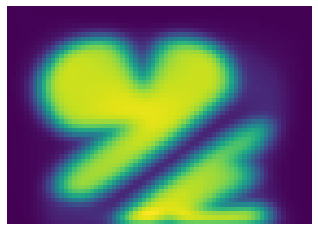

In [ ]:
plt.imshow(b)
plt.axis('off');

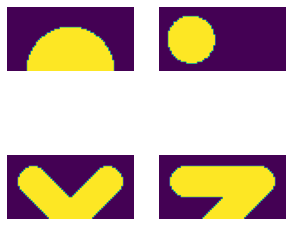

In [ ]:
N = 70
N0 = 35
import imageio
rescale = lambda x: (x-x.min())/(x.max()-x.min())
names = ['disk','twodisks','letter-x','letter-z']
vmin = .01
AA = np.zeros([N0,N,len(names)])
for i in range(len(names)):
    aa = imageio.imread("nt_toolbox/data/" + names[i] + ".bmp") # ,N) 
    aa = normalize(rescale(aa)+vmin)
    AA[:,:,i] = aa[:N0]
R = len(names)
plt.figure(figsize=(5,5))
for i in range(R):
    plt.subplot(2,2,i+1)
    plt.imshow(AA[:,:,i])
    plt.axis('off');

from P75 in Computational Optimal Transport

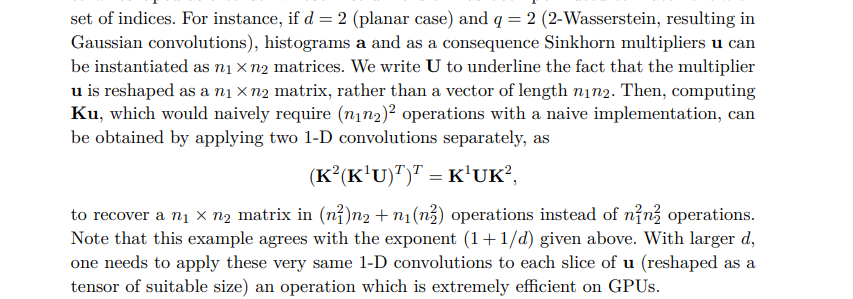

In [ ]:
#define new K with referece Computational Optimal Transport
t0 = np.linspace(0,1,N0)
[Y0,X0] = np.meshgrid(t0,t0)
K0 = np.exp(-(X0-Y0)**2/epsilon)
t1 = np.linspace(0,1,N)
[Y1,X1] = np.meshgrid(t1,t1)
K1 = np.exp(-(X1-Y1)**2/epsilon)
K = lambda x: (K0 @ x) @ K1

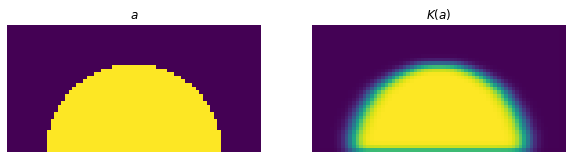

In [ ]:
#quite good right now
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(AA[:,:,0])
plt.title("$a$")
plt.axis('off');
plt.subplot(1,2,2)
plt.imshow(K(AA[:,:,0]))
plt.title("$K(a)$")
plt.axis('off');

[ 7.60930645 -3.15539252 -3.21981448 -3.26996261 -3.31092033 -3.34947669
 -3.38658851 -3.42333591 -3.46071911 -3.49590406]


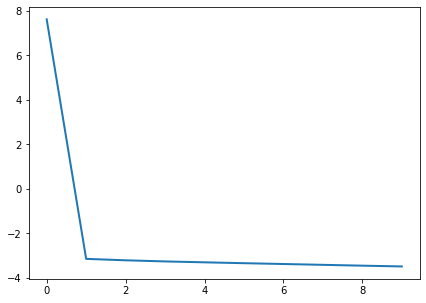

In [ ]:
from numpy import linalg
lambd = np.ones(R)/R
niter = 10
v = np.ones([N0,N,R])
u = np.copy(v)
Err_q = np.zeros(niter)

for i in range(niter):

    for k in range(R):
        Err_q[i] = Err_q[i] + linalg.norm(u[:,:,k]*K(v[:,:,k]) - AA[:,:,k], 1) # indexing problem with Err_q
        u[:,:,k] = AA[:,:,k]/K(v[:,:,k])

    b = np.zeros(N)
    for k in range(R):
        b = b + lambd[k] * np.log(np.maximum(1e-19*np.ones(np.shape(v[:,:,k])), v[:,:,k]*K(u[:,:,k])))
    b = np.exp(b)

    for k in range(R):
        v[:,:,k] = b/K(u[:,:,k])
print(np.log(Err_q))
plt.figure(figsize=(7,5))
plt.plot(np.log(Err_q),linewidth = 2)
plt.show()

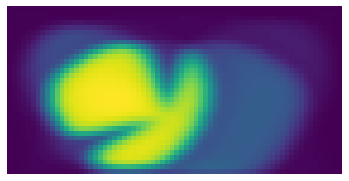

In [ ]:
plt.imshow(b)
plt.axis('off');

[ 7.60930645 -3.15539252 -3.21981448 -3.26996261 -3.31092033 -3.34947669
 -3.38658851 -3.42333591 -3.46071911 -3.49590406 -3.52932974 -3.56102044
 -3.59170736 -3.62020455 -3.64717104 -3.67363981 -3.7004539  -3.72622159
 -3.75324143 -3.7792818  -3.80557585 -3.83281891 -3.86136975 -3.88969563
 -3.92008396 -3.95196391 -3.98252727 -4.01243231 -4.0412428  -4.07162031
 -4.10360065 -4.13712306 -4.17202161 -4.20802947 -4.24075662 -4.27312466
 -4.3056344  -4.33915364 -4.37256953 -4.40547842 -4.43849739 -4.47119601
 -4.50360282 -4.53622508 -4.56891792 -4.60156589 -4.63408368 -4.66641354
 -4.69766577 -4.72494274 -4.74950891 -4.77193911 -4.79405909 -4.81635682
 -4.83889904 -4.86167503 -4.88467374 -4.90756062 -4.93034241 -4.95332615
 -4.97649966 -4.99985074 -5.02334348 -5.04689169 -5.07058153 -5.09440155
 -5.11834065 -5.14201864 -5.16564214 -5.189365   -5.21317774 -5.23707141
 -5.26103756 -5.28506827 -5.30915611 -5.33329414 -5.35747591 -5.3816602
 -5.40536651 -5.42908654 -5.45284009 -5.47652308 -5.

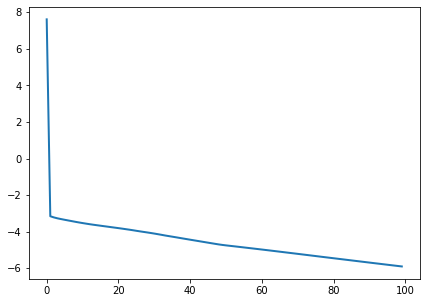

In [ ]:
from numpy import linalg
lambd = np.ones(R)/R
niter = 100
v = np.ones([N0,N,R])
u = np.copy(v)
Err_q = np.zeros(niter)

for i in range(niter):

    for k in range(R):
        Err_q[i] = Err_q[i] + linalg.norm(u[:,:,k]*K(v[:,:,k]) - AA[:,:,k], 1) # indexing problem with Err_q
        u[:,:,k] = AA[:,:,k]/K(v[:,:,k])

    b = np.zeros(N)
    for k in range(R):
        b = b + lambd[k] * np.log(np.maximum(1e-19*np.ones(np.shape(v[:,:,k])), v[:,:,k]*K(u[:,:,k])))
    b = np.exp(b)

    for k in range(R):
        v[:,:,k] = b/K(u[:,:,k])
print(np.log(Err_q))
plt.figure(figsize=(7,5))
plt.plot(np.log(Err_q),linewidth = 2)
plt.show()

something wrong happened with my code

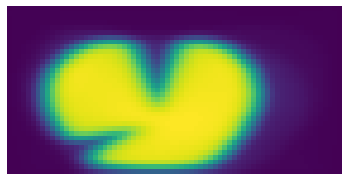

In [ ]:
plt.imshow(b)
plt.axis('off');

[  7.60930645  -3.15539252  -3.21981448 ... -34.50042369 -34.51869599
 -34.53754102]


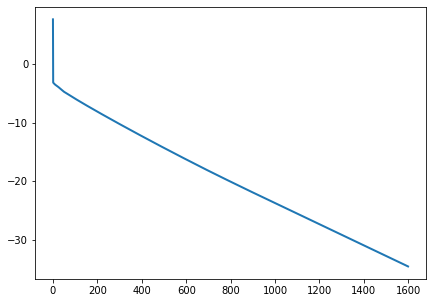

In [ ]:
from numpy import linalg
lambd = np.ones(R)/R
niter = 1600
v = np.ones([N0,N,R])
u = np.copy(v)
Err_q = np.zeros(niter)

for i in range(niter):

    for k in range(R):
        Err_q[i] = Err_q[i] + linalg.norm(u[:,:,k]*K(v[:,:,k]) - AA[:,:,k], 1) # indexing problem with Err_q
        u[:,:,k] = AA[:,:,k]/K(v[:,:,k])

    b = np.zeros(N)
    for k in range(R):
        b = b + lambd[k] * np.log(np.maximum(1e-19*np.ones(np.shape(v[:,:,k])), v[:,:,k]*K(u[:,:,k])))
    b = np.exp(b)

    for k in range(R):
        v[:,:,k] = b/K(u[:,:,k])
print(np.log(Err_q))
plt.figure(figsize=(7,5))
plt.plot(np.log(Err_q),linewidth = 2)
plt.show()

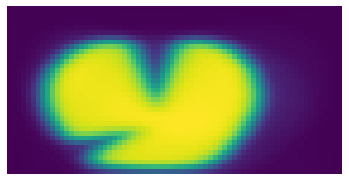

In [ ]:
plt.imshow(b)
plt.axis('off');